In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("Datasets/cov2/covid_19_data.csv")

In [3]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
4930,4931,03/11/20,Mississippi,US,2020-03-10T02:33:04,0,0,0
4931,4932,03/11/20,North Dakota,US,2020-03-10T02:33:04,0,0,0
4932,4933,03/11/20,West Virginia,US,2020-03-10T02:33:04,0,0,0
4933,4934,03/11/20,Wyoming,US,2020-03-10T02:33:04,0,0,0


In [4]:
data[data["Deaths"] == data["Deaths"].max()]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4719,4720,03/11/20,Hubei,Mainland China,2020-03-11T10:53:02,67773,3046,49134


In [5]:
country_data = data.groupby('Country/Region')

In [6]:
max_Death = country_data.sum().sort_values("Deaths")[:-10:-1]

In [7]:
max_conf = country_data.sum().sort_values("Confirmed")[:-10:-1]

In [8]:
max_recovered = country_data.sum().sort_values("Recovered")[:-10:-1]

In [10]:
max_Death.drop("SNo", axis =1, inplace = True)
max_conf.drop("SNo", axis =1, inplace = True)
max_recovered.drop("SNo", axis =1, inplace = True)

In [11]:
max_Death["Country"] = max_Death.index

In [12]:
max_Death

,Confirmed,Deaths,Recovered,Country
Country/Region,,,,
Mainland China,2554465,80616,961283,Mainland China
Italy,66824,3239,5454,Italy
Iran,54206,1912,15142,Iran
South Korea,80824,529,1496,South Korea
France,9688,177,234,France
US,5505,176,174,US
Spain,7619,155,349,Spain
Japan,7040,118,1034,Japan
Others,17780,102,619,Others


<BarContainer object of 9 artists>

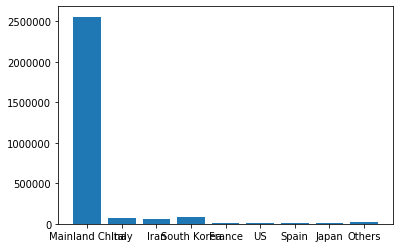

In [13]:
plt.bar(max_Death["Country"], max_Death["Confirmed"])

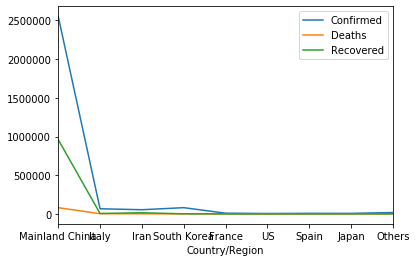

In [14]:
max_Death.plot();

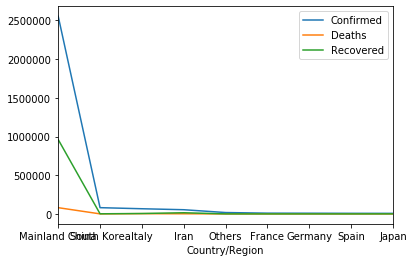

In [15]:
max_conf.plot();

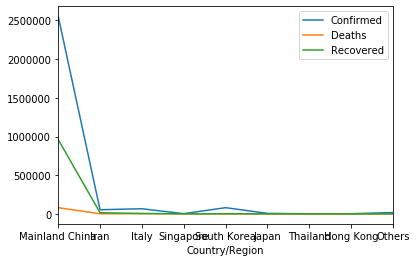

In [16]:
max_recovered.plot();

In [17]:
state = data.groupby('Province/State')

In [18]:
top_15_states = state.sum().sort_values("Confirmed")[:-15:-1]

In [19]:
top_15_states

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
Hubei,86401,2081337,77588,707882
Guangdong,86480,50499,169,25578
Henan,86569,46534,592,27247
Zhejiang,86604,46446,21,25624
Hunan,86645,38040,110,22430
Anhui,86681,35767,179,19881
Jiangxi,86766,33959,31,18809
Shandong,86867,24461,138,11644
Jiangsu,86897,22696,0,13081


In [26]:
top_15_states["min_weather"] = [5, -5, 7, 1, 0, 6, 6, 8,-11, 7,-4,-11,8,-5]
top_15_states["max_weather"] = [18, 16, 15, 20, 19, 19, 19, 17,14,19,10,22,20,16]

In [27]:
top_15_states

,SNo,Confirmed,Deaths,Recovered,min_weather,max_weather
Province/State,,,,,,
Hubei,86401,2081337,77588,707882,5,18
Guangdong,86480,50499,169,25578,-5,16
Henan,86569,46534,592,27247,7,15
Zhejiang,86604,46446,21,25624,1,20
Hunan,86645,38040,110,22430,0,19
Anhui,86681,35767,179,19881,6,19
Jiangxi,86766,33959,31,18809,6,19
Shandong,86867,24461,138,11644,8,17
Jiangsu,86897,22696,0,13081,-11,14
